# Filtering Cyclic patterns using Fast Fourier Transform (FFT)

This repository contains a Python script for filtering and visualizing time series data using Fast Fourier Transform (FFT). The script utilizes the Fourier domain to filter out high-frequency components, providing a smoothed representation of the original data. The data used for demonstration is a time series of power values with daily cyclic patterns.

## Features:
- Filtering function based on FFT for time series data.
- Visualization of both original and filtered time series data.
- Input data sourced from an Excel file.
- Adjustable cutoff frequency for customized filtering.

## Usage:
1. Clone the repository.
2. Provide your time series data in an Excel file.
3. Adjust parameters in the script, such as the file path and cutoff frequency.
4. Run the script to visualize the original and filtered time series data.

Feel free to explore and adapt the script for your own time series datasets. Contributions and improvements are welcome!


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#Import data
file_path = r"C:\Users\Miks\Dropbox\Jupyter skripti\projekti\ST\ciklika.xlsx"
data = pd.read_excel(file_path)

# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d.%m.%Y %H:%M')

data.head(5)

,DateTime,Power
0,2021-07-13 00:00:00,0.00
1,2021-07-13 01:00:00,10.25
2,2021-07-13 02:00:00,30.50
3,2021-07-13 03:00:00,80.75
4,2021-07-13 04:00:00,95.00


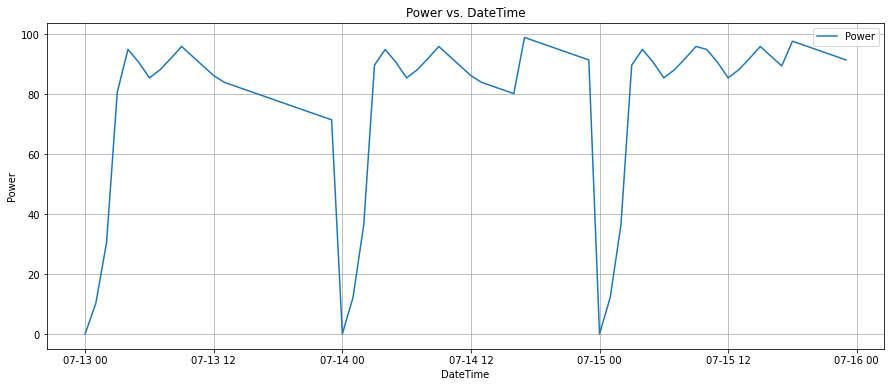

In [2]:
# Plotting with a longer x-axis
plt.figure(figsize=(15, 6))  # Increase the width (e.g., 15)
plt.plot(data['DateTime'], data['Power'], label='Power')
plt.title('Power vs. DateTime')
plt.xlabel('DateTime')
plt.ylabel('Power')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Miks\AppData\Local\Temp/ipykernel_16828/3644636443.py:10: RuntimeWarning: divide by zero encountered in divide
  xper = 1 / xfft


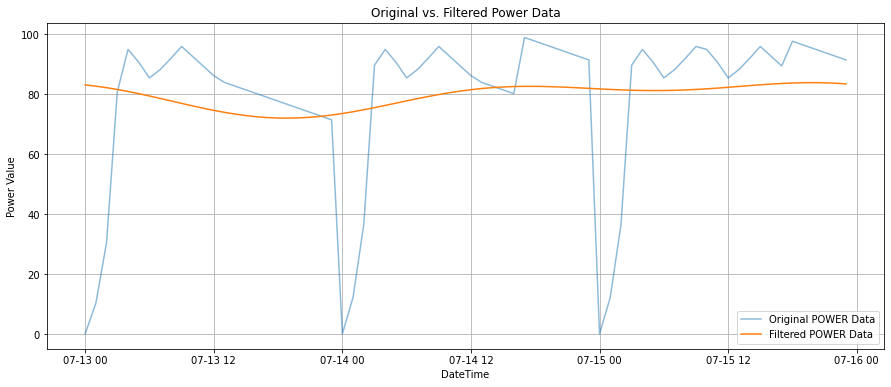

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the filtering function
def get_filtered(timein, seriein, cut_off=24 * 3600, low_pass=True):
    dt = float(np.min(np.diff(timein)) / 1e9)  # Use built-in 'float' here
    yfft = np.fft.fft(seriein)
    xfft = np.fft.fftfreq(np.size(seriein), dt)
    xper = 1 / xfft
    newfft = np.array(yfft, copy=True)
    if low_pass:
        kk = np.where(np.abs(xper) < cut_off)
        yfft[kk] = 0.0
    newserie = np.fft.ifft(yfft)
    return timein, newserie

# Load data from Excel file
file_path = r"C:\Users\Miks\Dropbox\Jupyter skripti\projekti\ST\ciklika.xlsx"
data = pd.read_excel(file_path)

# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d.%m.%Y %H:%M')

# Select the "Power" column as the time series data
time_series = data['Power'].values

# Filter the time series data using the filtering function using 24h
filtered_time_series = get_filtered(data['DateTime'], time_series, cut_off=24 * 3600)

# Create a new DataFrame with the filtered time series
filtered_data = pd.DataFrame({'DateTime': filtered_time_series[0], 'Filtered_Power': filtered_time_series[1]})

# Visualize both the original and filtered time series data on the same plot
plt.figure(figsize=(15, 6))
plt.plot(data['DateTime'], data['Power'], label='Original POWER Data', alpha=0.5)
plt.plot(filtered_data['DateTime'], np.real(filtered_data['Filtered_Power']), label='Filtered POWER Data')
plt.xlabel('DateTime')
plt.ylabel('Power Value')
plt.legend()
plt.title('Original vs. Filtered Power Data')
plt.grid(True)
plt.show()
